# COVID-19 Image classification

## Importing Libraries

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf
import cv2
import csv 
import pandas as pd

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
import pathlib
import shutil
import itertools
import seaborn as sns
import imageio
import glob


## Loading Images from npy file

In [3]:

trainImages = np.load('C:/Users/user/Desktop/Covid Classification/trainimage.npy')

testImages = np.load('C:/Users/user/Desktop/Covid Classification/testimage.npy') 



## Shape of training data

In [4]:
print(trainImages.shape)

(251, 128, 128, 3)


## Shape of testing data

In [5]:
print(testImages.shape)

(66, 128, 128, 3)


## Loading label files

In [6]:
# loading csv files
with open('testLabels.csv',mode='r') as test_csv_file:    
    test_reader = csv.reader(test_csv_file) 
    next(test_reader)
    testRows=list(test_reader)

    
with open('trainLabels.csv',mode='r') as train_csv_file:    
    train_reader = csv.reader(train_csv_file) 
    next(train_reader)
    trainRows=list(train_reader)

### function to remove images in directory 

In [7]:

def removefilesfromdirectory(trainDir,testDir):
    
    for f in os.listdir(trainDir):
        shutil.rmtree(os.path.join(trainDir, f))
    for f in os.listdir(testDir):
        os.remove(os.path.join(testDir, f))

## adding training and testing images to folder

In [8]:
train_dir='train'
test_dir='test'
removefilesfromdirectory(train_dir,test_dir)

os.makedirs(train_dir+'\Covid')
os.makedirs(train_dir+'\\Normal')
os.makedirs(train_dir+'\Viral Pneumonia')

for i in range(len(trainImages)):
    trainImage= PIL.Image.fromarray(trainImages[i])
    if trainRows[i][0]=="Normal":
        directory="Normal"
        imageName="Normal"
        image_category="1"
    elif trainRows[i][0]=="Covid":
        directory="Covid"
        imageName="Covid"
        image_category="0"
    else:
        directory="Viral Pneumonia"
        imageName="Viral Pneumonia"
        image_category="2"
        
    trainImage.save('train/'+directory+'/'+imageName+'-'+str(i)+'_'+image_category+ '.jpg' )
    
    
for j in range(len(testImages)):
    testImage= PIL.Image.fromarray(testImages[j])
    if testRows[j][0]=="Normal":
    
        directory="Normal"
        imageName="Normal"
        image_category="1"
    elif testRows[j][0]=="Covid":
    
        image_category="0"
        directory="Covid"
        imageName="Covid"
    else:
       
        directory="Viral Pneumonia"
        imageName="Viral Pneumonia"
        image_category="2"
   


    testImage.save('test/'+str(j+1)+'_'+str(image_category)+ '.jpg')
    

In [9]:
data_dir=pathlib.Path(train_dir)
image_count = len(list(data_dir.glob('*/*.jpg')))
print(image_count)

251


## Adding the images to a dataframe 

In [10]:
train_covid_image_list = os.listdir(r'C:\Users\user\Desktop\Covid Classification\train\Covid')
train_pneumonia_image_list = os.listdir(r'C:\Users\user\Desktop\Covid Classification\train\Viral Pneumonia')
train_normal_image_list = os.listdir(r'C:\Users\user\Desktop\Covid Classification\train\Normal')
test_image_list = os.listdir(r'C:\Users\user\Desktop\Covid Classification\test')

# Function to select the 4th index from the end of the string (file name)
df_covid_train = pd.DataFrame(train_covid_image_list, columns=['image_id'])
df_normal_train = pd.DataFrame(train_normal_image_list, columns=['image_id'])
df_pneumonia_train = pd.DataFrame(train_pneumonia_image_list, columns=['image_id'])
df_test = pd.DataFrame(test_image_list, columns=['image_id'])

def extract_target(x):
    target = int(x[-5])
    if target == 1:
        return 'Normal'
    if target == 0:
        return 'Covid'
    if target == 2:
        return 'Viral Pneumonia'

# Assign the target labels
df_train=pd.concat([df_covid_train, df_normal_train,df_pneumonia_train])

df_train['target'] = df_train['image_id'].apply(extract_target)

df_test['target'] = df_test['image_id'].apply(extract_target)

# Visualizing Images

### function to visualize images

In [11]:
def draw_category_images(col_name,figure_cols, df, IMAGE_PATH):
    
    
    categories = (df.groupby([col_name])[col_name].nunique()).index
    f, ax = plt.subplots(nrows=len(categories),ncols=figure_cols, 
                         figsize=(4*figure_cols,4*len(categories))) # adjust size here
    # draw a number of images for each location
    for i, cat in enumerate(categories):
        sample = df[df[col_name]==cat].sample(figure_cols) # figure_cols is also the sample size
        
        
        for j in range(0,figure_cols):
            cat = int(sample.iloc[j]['image_id'][-5])
            if cat==0:
                subdir="Covid"
            elif cat==1:
                subdir="Normal"
            elif cat==2:
                subdir="Viral Pneumonia"
            
            file=IMAGE_PATH+subdir+'\\'+ sample.iloc[j]['image_id']
            image=imageio.imread(file)
            ax[i, j].imshow(image, resample=True, cmap='gray')
            ax[i, j].set_title(subdir, fontsize=14)  
    plt.tight_layout()
    plt.show()
    


## Vizualize training data

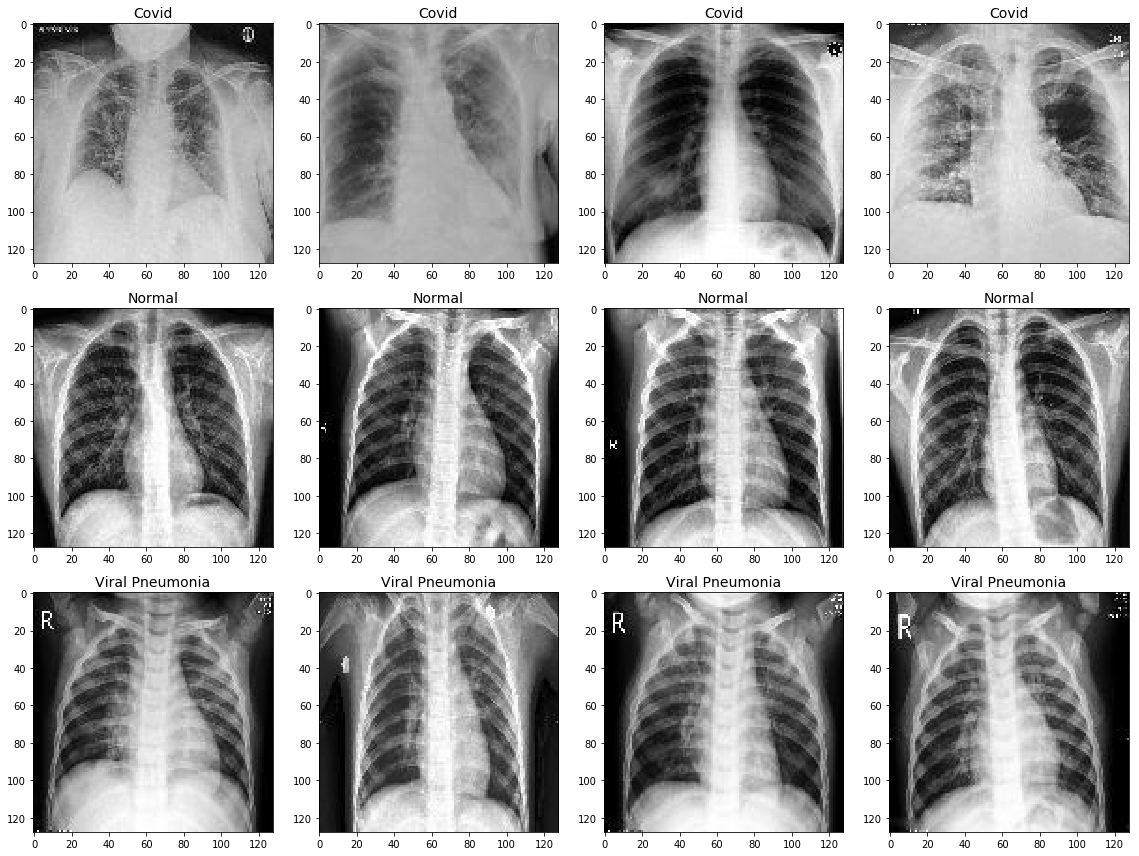

In [12]:
IMAGE_PATH = r'C:\Users\user\Desktop\Covid Classification\train\\' 

draw_category_images('target',4, df_train, IMAGE_PATH)

### function to vizualize testing data

In [13]:
def draw_testing_images(col_name,figure_cols, df, IMAGE_PATH):
    
    
    categories = (df.groupby([col_name])[col_name].nunique()).index
    f, ax = plt.subplots(nrows=len(categories),ncols=figure_cols, 
                         figsize=(4*figure_cols,4*len(categories))) # adjust size here
    # draw a number of images for each location
    for i, cat in enumerate(categories):
        sample = df[df[col_name]==cat].sample(figure_cols) # figure_cols is also the sample size
        
        for j in range(0,figure_cols):
            
            file=IMAGE_PATH+ sample.iloc[j]['image_id']
            image=imageio.imread(file)
            ax[i, j].imshow(image, resample=True, cmap='gray') 
    plt.tight_layout()
    plt.show()

## Visualize testing data

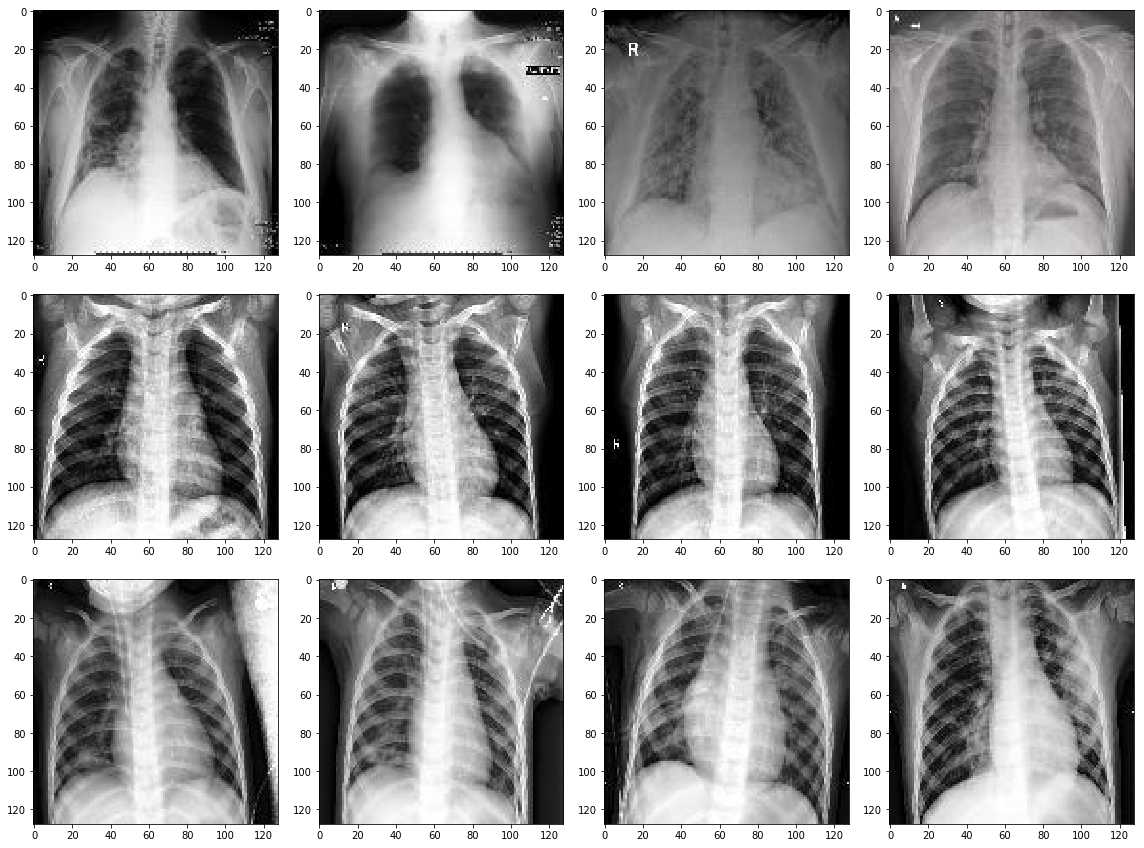

In [14]:
IMAGE_PATH = r'C:\Users\user\Desktop\Covid Classification\test\\' 

draw_testing_images('target',4, df_test, IMAGE_PATH)

# Exploring Data

## Value Count of training data

Covid              111
Viral Pneumonia     70
Normal              70
Name: target, dtype: int64
AxesSubplot(0.125,0.125;0.775x0.755)


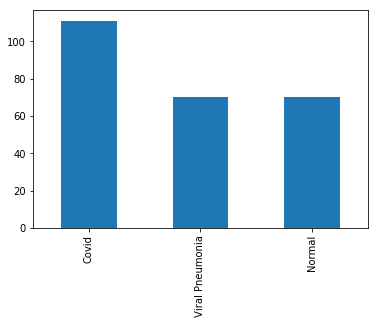

In [15]:
sTrain=df_train['target'].value_counts()
print(sTrain)
print(sTrain.plot.bar())

## Value count of testing data

Covid              26
Viral Pneumonia    20
Normal             20
Name: target, dtype: int64
AxesSubplot(0.125,0.125;0.775x0.755)


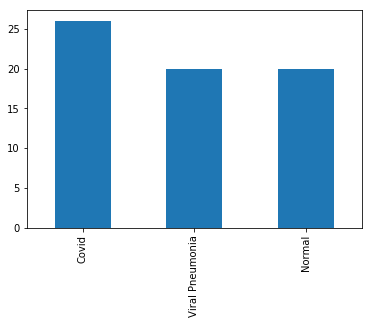

In [16]:
sTest=df_test['target'].value_counts()
print(sTest)
print(sTest.plot.bar())

## Unique labels in training set

In [17]:
print(pd.Series({'nunique':len(sTrain), 'unique values': sTrain.index.tolist()}))

nunique                                         3
unique values    [Covid, Viral Pneumonia, Normal]
dtype: object


# Data Pre-processing:

## Gaussian Blurring

In [18]:
# removefilesfromdirectory(train_dir,test_dir)
os.chdir(r'C:\Users\user\Desktop\Covid Classification')

for i in range(3):
    if i == 0:
        subdir= 'Covid'
    if i == 1:
        subdir= 'Normal'
    if i == 2:
        subdir= 'Viral Pneumonia'
    os.chdir("train/"+subdir+"/")
    for file in glob.glob("*.jpg"):
        img = cv2.imread(file)
        blur = cv2.GaussianBlur(img,(5,5),0)
        filename = file
        cv2.imwrite(filename,blur)
    os.chdir(r'C:\Users\user\Desktop\Covid Classification')

os.chdir(r'C:\Users\user\Desktop\Covid Classification')

os.chdir("test/")
for file in glob.glob("*.jpg"):
    img = cv2.imread(file)
    blur = cv2.GaussianBlur(img,(5,5),0)
    filename = file
    cv2.imwrite(filename,blur)
    
    



os.chdir(r'C:\Users\user\Desktop\Covid Classification')


## Visualizing Training data after Gaussian filter

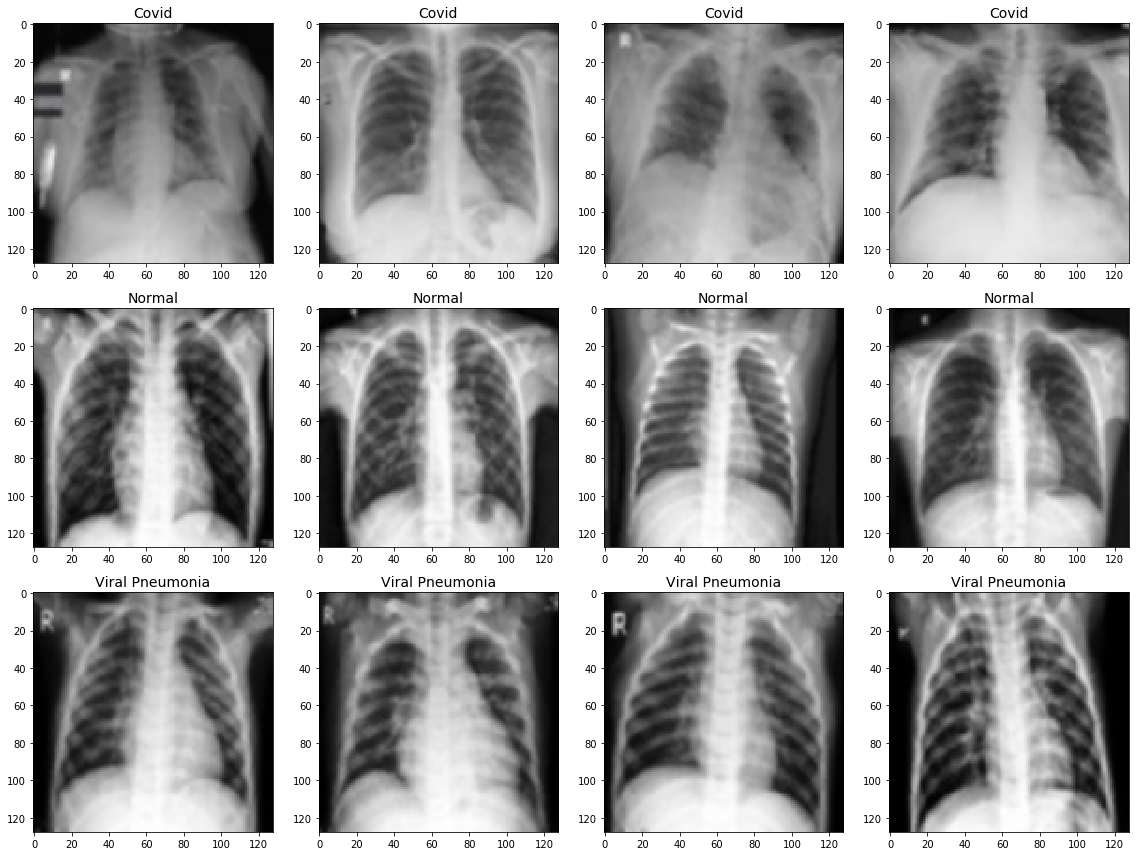

In [19]:
IMAGE_PATH = r'C:\Users\user\Desktop\Covid Classification\train\\' 

draw_category_images('target',4, df_train, IMAGE_PATH)

## Visualizing Testing data after Gaussian filter

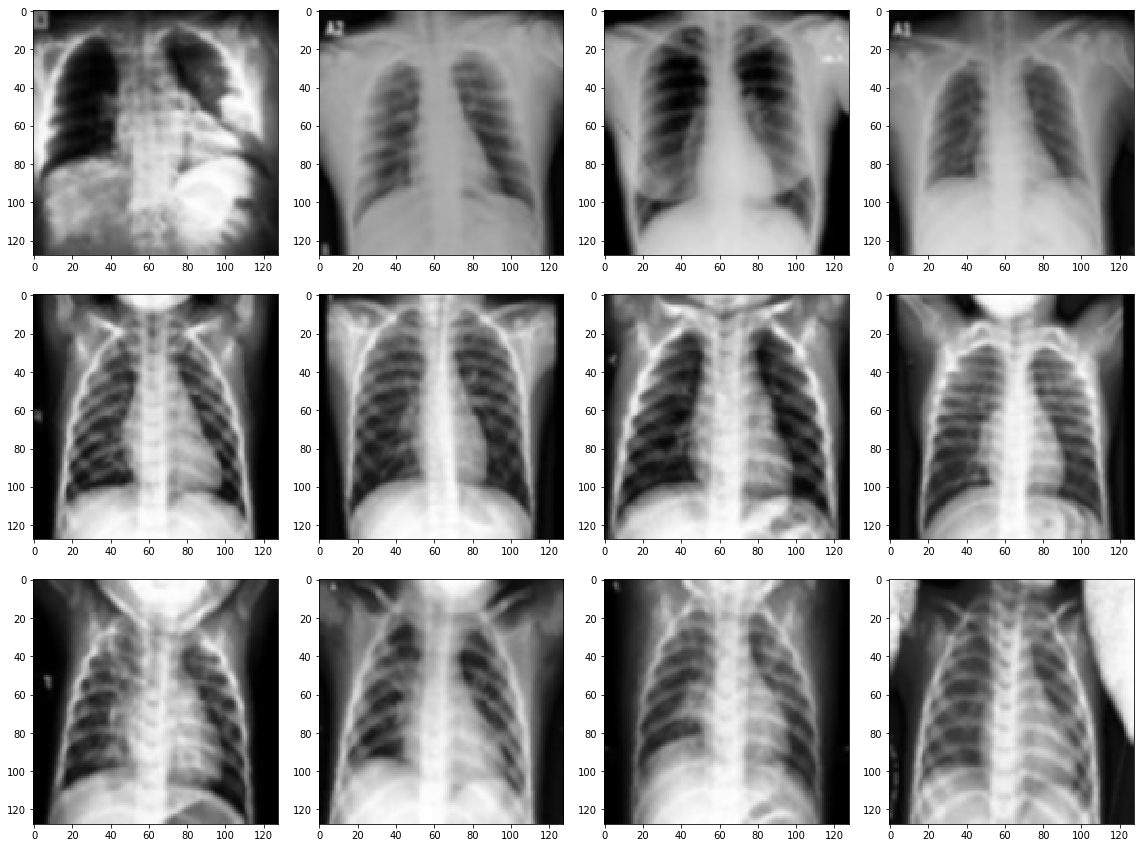

In [20]:
IMAGE_PATH = r'C:\Users\user\Desktop\Covid Classification\test\\' 

draw_testing_images('target',4, df_test, IMAGE_PATH)

In [21]:
batch_size = 32
img_height = 180
img_width = 180

In [22]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 251 files belonging to 3 classes.
Using 201 files for training.


In [23]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 251 files belonging to 3 classes.
Using 50 files for validation.


## Labels

In [24]:
class_names = train_ds.class_names

print(class_names)

['Covid', 'Normal', 'Viral Pneumonia']


In [25]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

## Normalizing

In [26]:
normalization_layer = layers.experimental.preprocessing.Rescaling(1./255)

## Reshaping

In [27]:
data_augmentation = keras.Sequential(
  [
    layers.experimental.preprocessing.RandomFlip("horizontal", 
                                                 input_shape=(img_height, 
                                                              img_width,
                                                              3)),
    layers.experimental.preprocessing.RandomRotation(0.1),
    layers.experimental.preprocessing.RandomZoom(0.1),
  ]
)

## Defining Layers

In [28]:
num_classes = 3

model = Sequential([
  data_augmentation,
  layers.experimental.preprocessing.Rescaling(1./255),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

## Set optimizer and loss function. (Use Adam optimizer and categorical crossentropy.)

In [29]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])


In [30]:
model.summary()


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential (Sequential)      (None, 180, 180, 3)       0         
_________________________________________________________________
rescaling_1 (Rescaling)      (None, 180, 180, 3)       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 180, 180, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 90, 90, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 90, 90, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 45, 45, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 45, 45, 64)       

## Fitting model

In [32]:
epochs=15
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/15
7/7 [==============================] - 7s 968ms/step - loss: 0.2522 - accuracy: 0.9154 - val_loss: 0.1318 - val_accuracy: 0.9600
Epoch 2/15
7/7 [==============================] - 7s 945ms/step - loss: 0.2514 - accuracy: 0.8905 - val_loss: 0.1904 - val_accuracy: 0.9400
Epoch 3/15
7/7 [==============================] - 7s 964ms/step - loss: 0.2381 - accuracy: 0.9353 - val_loss: 0.1473 - val_accuracy: 0.9600
Epoch 4/15
7/7 [==============================] - 7s 966ms/step - loss: 0.2427 - accuracy: 0.9005 - val_loss: 0.1691 - val_accuracy: 0.9600
Epoch 5/15
7/7 [==============================] - 7s 960ms/step - loss: 0.3119 - accuracy: 0.8756 - val_loss: 0.1746 - val_accuracy: 0.9600
Epoch 6/15
7/7 [==============================] - 7s 1s/step - loss: 0.2786 - accuracy: 0.8557 - val_loss: 0.1427 - val_accuracy: 0.9400
Epoch 7/15
7/7 [==============================] - 7s 1s/step - loss: 0.2345 - accuracy: 0.9104 - val_loss: 0.1394 - val_accuracy: 0.9600
Epoch 8/15
7/7 [==========

In [33]:
#uncomment to save model
# history.history
# model.save("covidmodel")

## Evaluating the model

In [34]:
print(model.metrics_names)

['loss', 'accuracy']


In [35]:

result = model.evaluate(val_ds)
dict(zip(model.metrics_names, result))


2/2 [==============================] - 0s 146ms/step - loss: 0.1219 - accuracy: 0.9600


{'loss': 0.12186136841773987, 'accuracy': 0.9599999785423279}

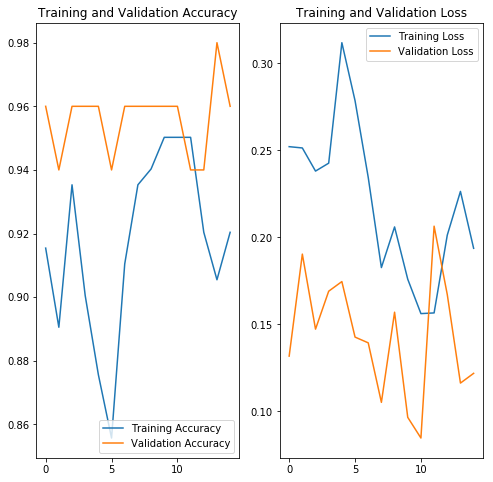

In [36]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

## Confusion Matrix

### Add test images to array

In [37]:
x_test=os.listdir(r'C:\Users\user\Desktop\Covid Classification\test')
imageArray=[]
for i in range(len(testImages)):
    covidImagePath=pathlib.Path(test_dir+'/'+x_test[i])
    img=keras.preprocessing.image.load_img(covidImagePath,target_size=(img_height, img_width))

    img_array = keras.preprocessing.image.img_to_array(img)
    img_array = tf.expand_dims(img_array, 0) # Create a batch
    imageArray.append(img_array)

# stack up images list to pass for prediction
imageArray = np.vstack(imageArray)
classes = np.argmax(model.predict(imageArray), axis=-1)
print(classes)

[2 2 2 2 2 2 2 1 2 2 2 2 0 0 0 0 0 0 0 0 0 2 0 1 0 1 0 0 0 0 0 0 2 1 0 0 0
 0 0 0 1 1 1 2 1 1 1 1 2 1 2 1 1 1 2 1 1 1 1 1 1 1 0 2 2 0]


### Add labels to array

In [38]:
test_labels=[]

for i in range(len(testRows)):
    
    if testRows[i][0]=="Normal":
        test_labels.append(1)
    elif testRows[i][0]=="Covid":
        test_labels.append(0)
    else:
        test_labels.append(2)
        

print(test_labels)

[2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


### print confusion matrix

#### function to display confusion matrix

In [39]:
def show_confusion_matrix(cm, labels):
  plt.figure(figsize=(10, 8))
  sns.heatmap(cm, xticklabels=labels, yticklabels=labels, 
              annot=True, fmt='g')
  plt.xlabel('Prediction')
  plt.ylabel('Label')
  plt.show()

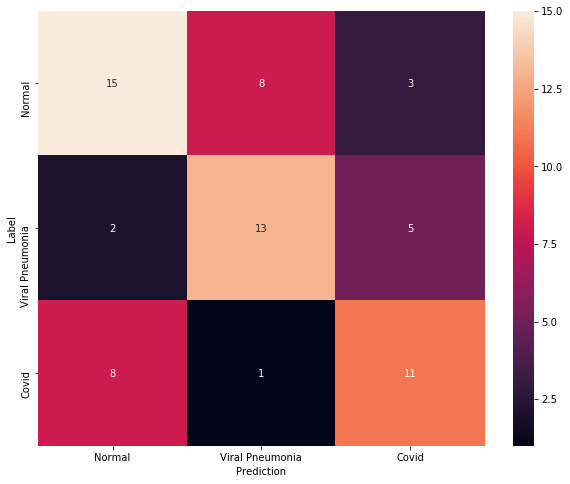

In [40]:
cm = tf.math.confusion_matrix(test_labels, classes,num_classes=3)
cm_plot_labels = ['Normal', 'Viral Pneumonia','Covid']
show_confusion_matrix(cm,cm_plot_labels )

## Visualize predictions for x_test[2], x_test[3], x_test[33], x_test[36], x_test[59].

### function for getting predictions

In [41]:
def getPrediction(image_number):
    covidImagePath=pathlib.Path(test_dir+'/'+x_test[image_number])

    img=keras.preprocessing.image.load_img(covidImagePath,target_size=(img_height, img_width))

    img_array = keras.preprocessing.image.img_to_array(img)
    img_array = tf.expand_dims(img_array, 0) # Create a batch
    predictions = model.predict(img_array)
    score = tf.nn.softmax(predictions[0])
    
    print(
        "This image most likely belongs to {} with a {:.2f} percent confidence."
        .format(class_names[np.argmax(score)], 100 * np.max(score))
    )
    
    print("Predicted Data")
    print("******************")
    y = np.array([100 * np.max(score),(100-100 * np.max(score))])
    mylabels = [class_names[np.argmax(score)], "Other"]
    plt.pie(y, labels = mylabels)
    plt.legend()
    
    plt.show() 
    
    print("True Value")
    print("******************")
    y = np.array([100 ])
    if test_labels[image_number]==0:
        ino="Covid"
    elif test_labels[image_number]==1:
        ino="Normal"
    elif test_labels[image_number]==2:
        ino="Viral Pneumonia"
    mylabels = [ino]
    plt.pie(y, labels = mylabels)
    plt.legend()

    plt.show() 
                   
    




## predictions for x_test[2], x_test[3], x_test[33], x_test[36], x_test[59]

### x_test[2]

This image most likely belongs to Viral Pneumonia with a 98.18 percent confidence.
Predicted Data
******************


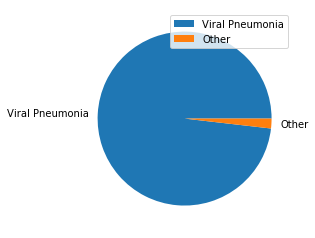

True Value
******************


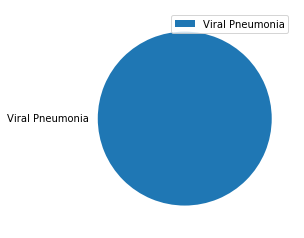

In [42]:
getPrediction(2)


### x_test[3]

This image most likely belongs to Viral Pneumonia with a 99.57 percent confidence.
Predicted Data
******************


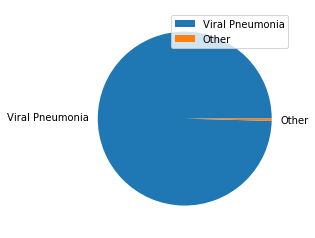

True Value
******************


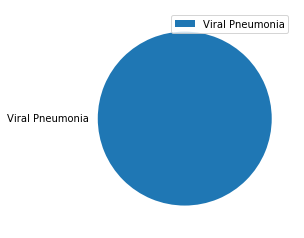

In [43]:
getPrediction(3)


### x_test[33]

This image most likely belongs to Normal with a 97.19 percent confidence.
Predicted Data
******************


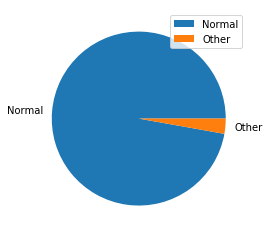

True Value
******************


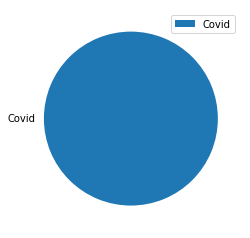

In [44]:
getPrediction(33)


### x_test[36]

This image most likely belongs to Covid with a 99.24 percent confidence.
Predicted Data
******************


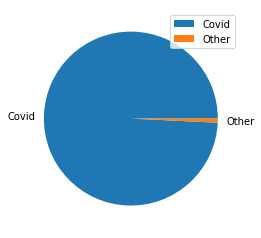

True Value
******************


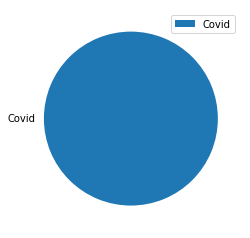

In [45]:
getPrediction(36)


### x_test[59]

This image most likely belongs to Normal with a 98.80 percent confidence.
Predicted Data
******************


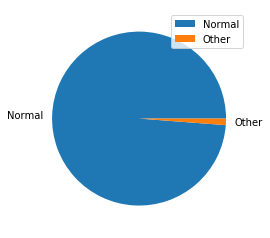

True Value
******************


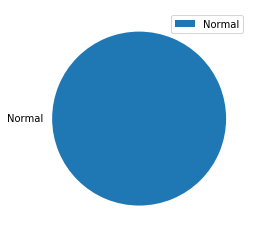

In [46]:
getPrediction(59)
